<a href="https://colab.research.google.com/github/internextengineering/Thermowiz/blob/pytorchcnn/Pytorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/My\ Drive/thermal vision data
len(os.listdir())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1a1VT5iJVH37WERotmJap5XJoUJViC9z9/thermal vision data


302

(240, 320, 3)


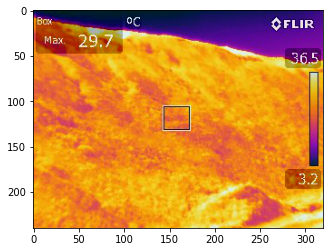

In [14]:
img = mpimg.imread('IR_0051.jpg')
print(img.shape)
plt.imshow(img)

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=2, activation="softmax"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

In [19]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader

from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [ ]:
#dataset = datasets.ImageFolder('thermal vision data')
allimgs = 
for img in os.listdir('thermal vision data'):
  if img[0:2] == "IR":
#mormalize all the images for stable training

SyntaxError: ignored

In [ ]:
class CNNNet(Module):   
    def __init__(self):
        super(CNNNet, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(in_channels=3, out_channels=1, kernel_size=(3, 3), stride=1, padding =1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [ ]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
# defining the model
model = CNNNet()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()

In [ ]:
imgt = torch.from_numpy(img)

with torch.no_grad():
    output = model(imgt)

RuntimeError: ignored

In [16]:
img = np.moveaxis(img, 2, 0)
print(img.shape)


(3, 240, 320)


In [24]:
imgt = torch.tensor(img, dtype= torch.float)
imgt = imgt.unsqueeze(0)
print(imgt.shape)

torch.Size([1, 3, 240, 320])


In [28]:
yu = Conv2d(in_channels=3, out_channels=1, kernel_size=(3, 3), stride=2,)
oot= yu(imgt)
print(oot.shape)
oot

torch.Size([1, 1, 119, 159])


tensor([[[[-15.4144, -22.8497, -19.5979,  ..., -14.3916, -13.5087, -13.4057],
          [-23.2166, -16.2725, -11.0051,  ..., -13.4229, -13.8970, -13.2116],
          [-15.6688,  -3.9912, -11.2001,  ..., -12.2012, -14.0444, -13.1220],
          ...,
          [ -4.6173,  -5.5848,  -2.3118,  ..., -36.3205, -44.6621, -49.3386],
          [ -4.4767,  -4.2963,   3.6241,  ..., -53.0931, -69.5458, -79.4329],
          [ -4.8376,   2.0750,   0.2345,  ..., -77.5290, -82.6780, -88.7473]]]],
       grad_fn=<MkldnnConvolutionBackward>)